<a href="https://colab.research.google.com/github/AndheraYoddha/ML_Dummy/blob/main/Youtube_Streamer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: YouTube Streamer Analysis

Dataset : Top 1000 Youtubers statistics

Description: This dataset contains valuableinformation about the top YouTube streamers,including their ranking, categories, subscribers,country, visits, likes, comments, and more.Your task is to perform a comprehensiveanalysis of the dataset to extract insightsabout the top YouTube content creators.



# 1. Data Exploration:
- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics


In [3]:
df = pd.read_csv('youtubers_df.csv')



In [4]:
df.head(10)


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [5]:
df.info

<bound method DataFrame.info of      Rank              Username           Categories   Suscribers  \
0       1               tseries       Música y baile  249500000.0   
1       2               MrBeast   Videojuegos, Humor  183500000.0   
2       3             CoComelon            Educación  165500000.0   
3       4              SETIndia                  NaN  162600000.0   
4       5         KidsDianaShow  Animación, Juguetes  113500000.0   
..    ...                   ...                  ...          ...   
995   996          hamzymukbang                  NaN   11700000.0   
996   997            Adaahqueen                  NaN   11700000.0   
997   998  LittleAngelIndonesia       Música y baile   11700000.0   
998   999          PenMultiplex                  NaN   11700000.0   
999  1000         OneindiaHindi  Noticias y Política   11700000.0   

            Country       Visits      Likes  Comments  \
0             India      86200.0     2700.0      78.0   
1    Estados Unidos  1174

In [6]:
print(df.isnull().sum())

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


In [7]:
df['Categories'].value_counts()

Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehículos      

In [8]:
print(df.describe())


              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


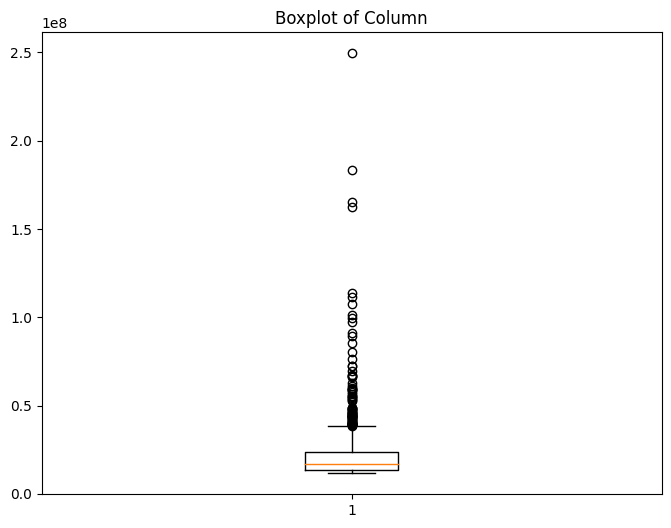

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['Suscribers'])
plt.title('Boxplot of Column')
plt.show()

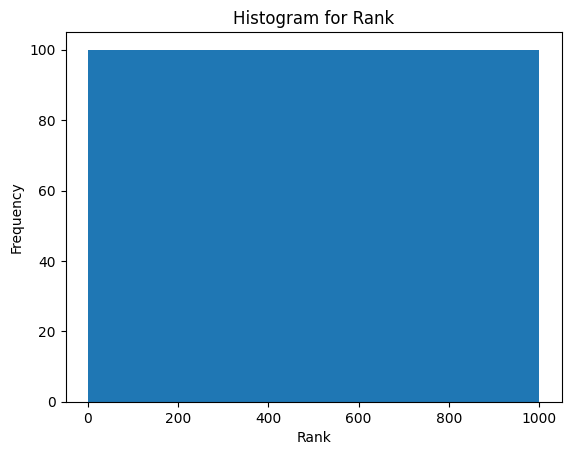

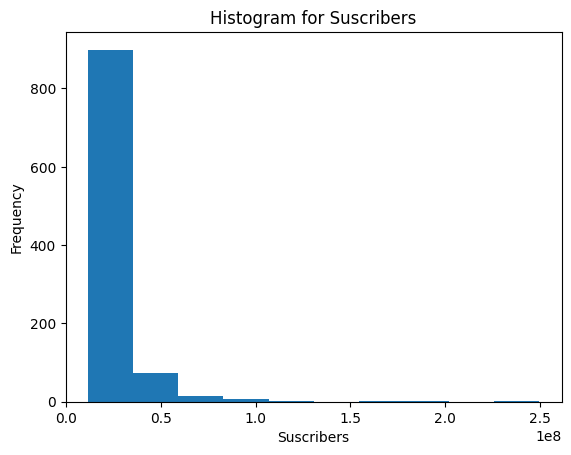

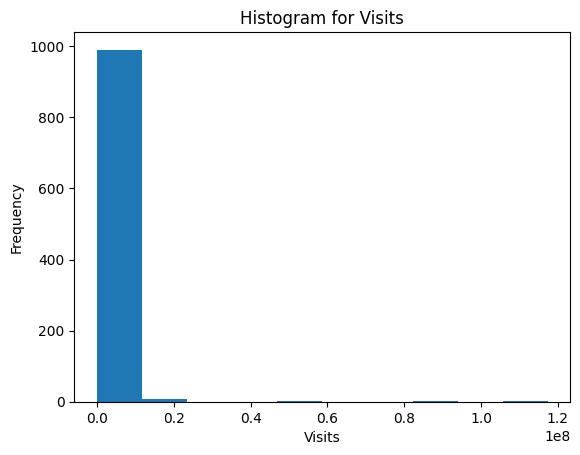

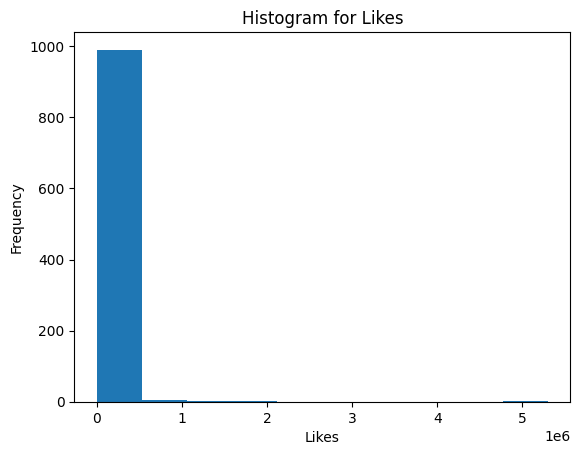

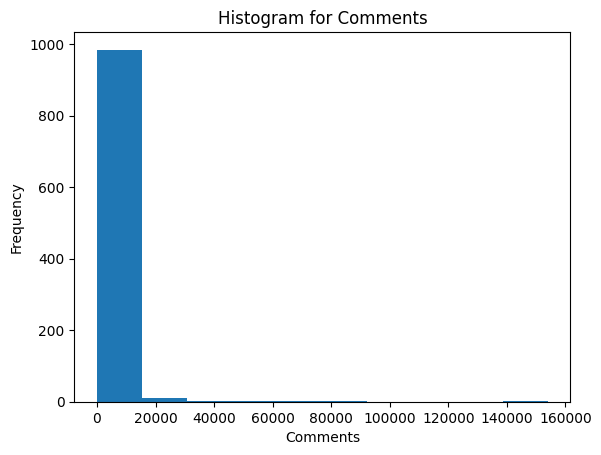

In [10]:
import matplotlib.pyplot as plt
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.hist(df[column].dropna())
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


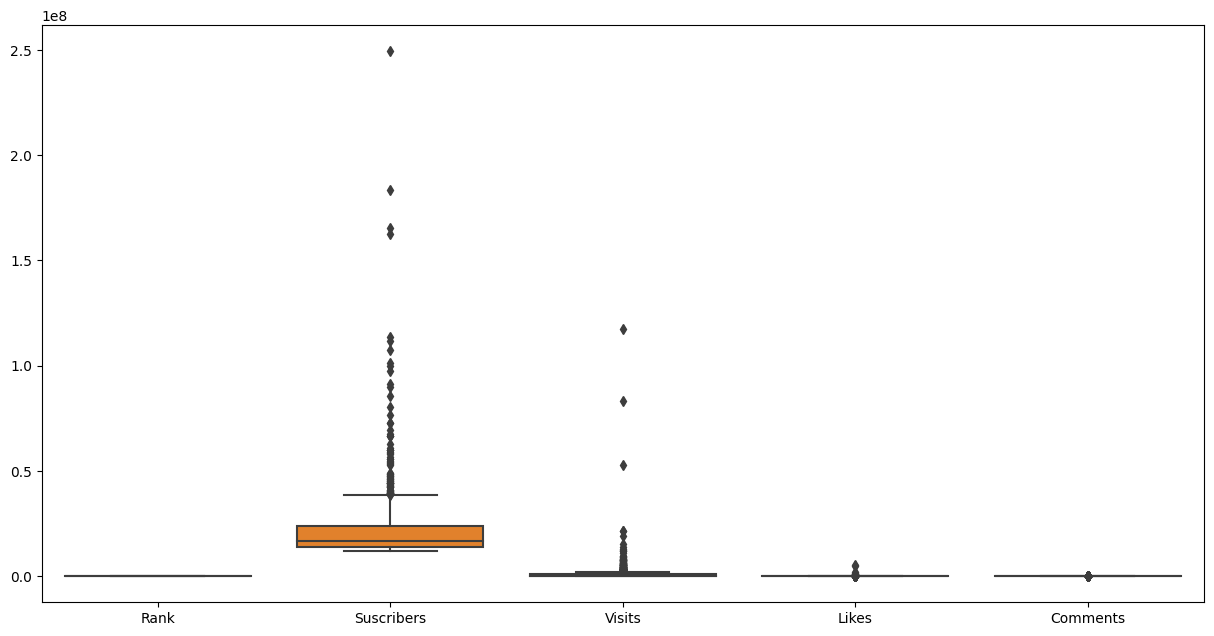

In [11]:
plt.figure(figsize=(15,7.5))
sns.boxplot(df)
plt.show()

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rank,Suscribers,Visits,Likes,Comments
Rank,1.000000,-0.636552,-0.102714,-0.090913,-0.049194
Suscribers,-0.636552,1.000000,0.245203,0.211639,0.036350
Visits,-0.102714,0.245203,1.000000,0.950470,0.324067
Likes,-0.090913,0.211639,0.950470,1.000000,0.325911
Comments,-0.049194,0.036350,0.324067,0.325911,1.000000


In [13]:
df.head()


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [14]:
df['Country']=df['Country'].replace('Unknown',np.nan)

In [15]:
df['Country'].isna().sum()

171

In [16]:
df['Country'].mode()

0    Estados Unidos
Name: Country, dtype: object

# Data Cleaning

In [17]:
mode_country = df['Country'].mode()[0]
df['Country'] = df['Country'].fillna(mode_country)

In [18]:
mode_category=df['Categories'].mode()[0]
df['Categories']=df['Categories'].fillna(mode_country)

In [19]:
df.isna().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

# 2. Trend Analysis:
- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [20]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Estados Unidos,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Estados Unidos,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Estados Unidos,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [21]:
category_subs=df.groupby('Categories')['Suscribers'].sum().reset_index()#category famous in terms of subscribers

In [22]:
sorted_data = category_subs.sort_values(by='Suscribers', ascending=False)

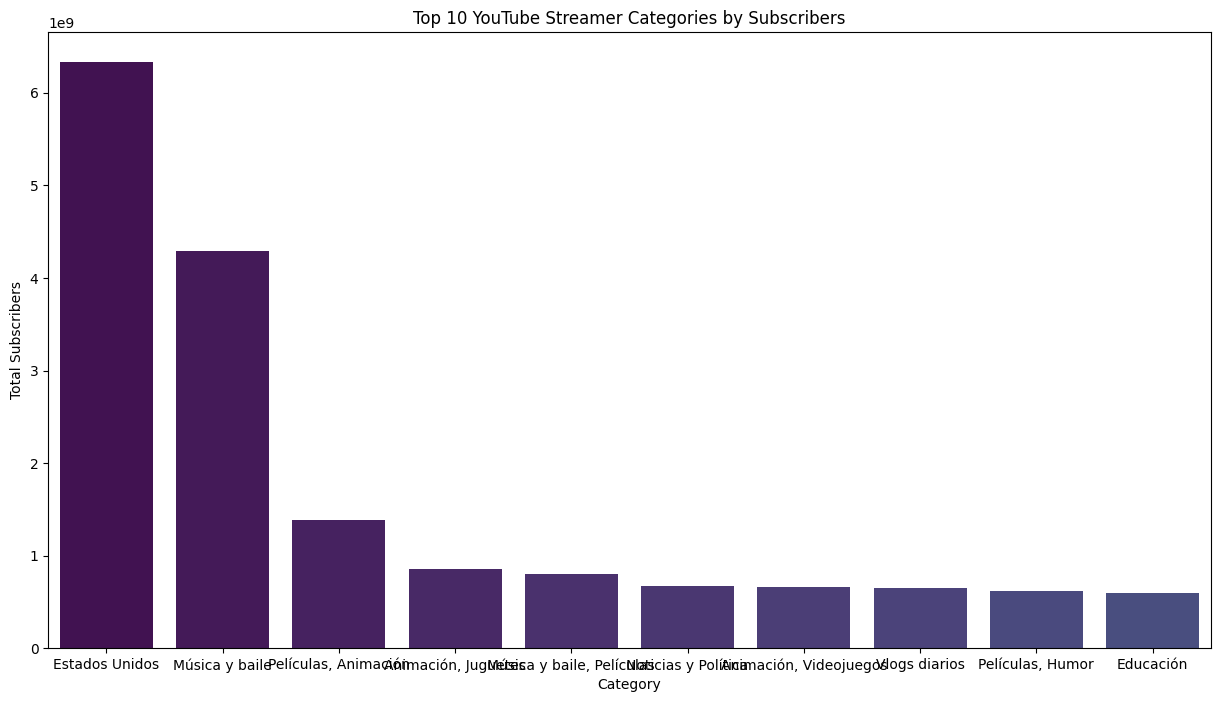

In [44]:
sorted_data = category_subs.sort_values(by='Suscribers', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Categories', y='Suscribers', data=sorted_data.head(10), palette=colors)
plt.title('Top 10 YouTube Streamer Categories by Subscribers')
plt.xlabel('Category')
plt.ylabel('Total Subscribers')

plt.show()

In [24]:
category_likes=df.groupby('Categories')['Likes'].sum().reset_index()#category famous in terms of subscribers

In [25]:
sorted_data = category_likes.sort_values(by='Likes', ascending=False)

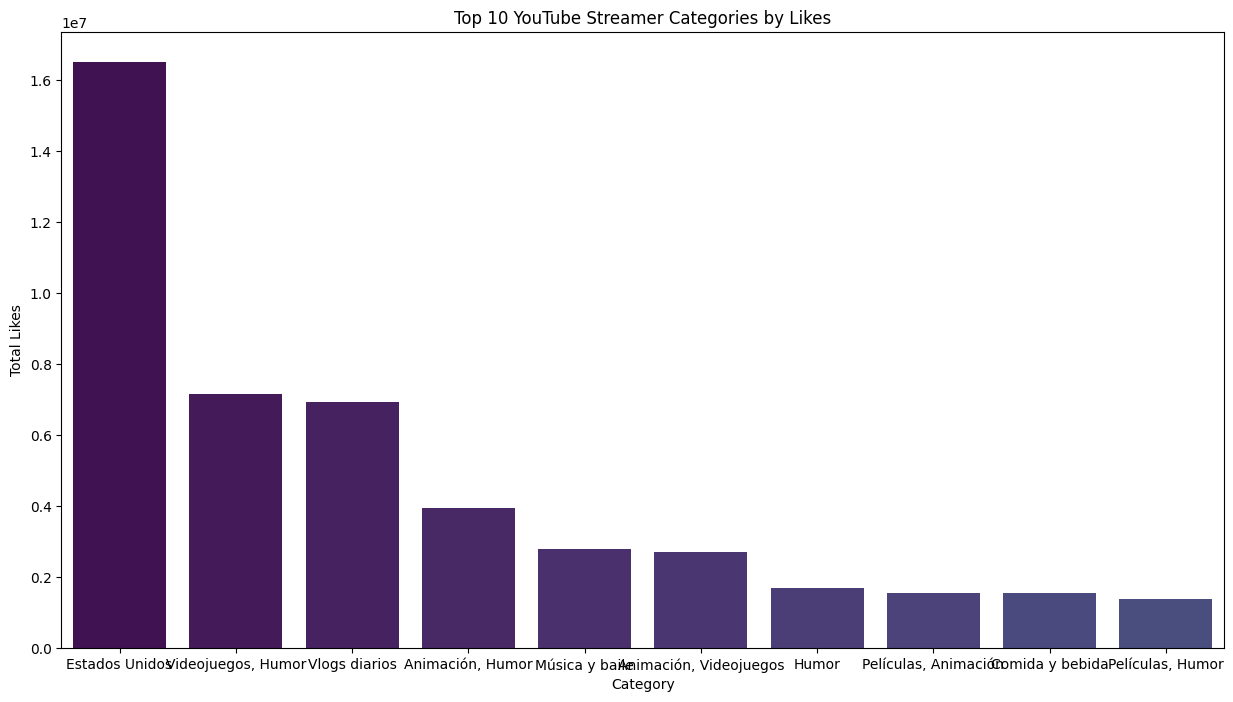

In [45]:
sorted_data = category_likes.sort_values(by='Likes', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Categories', y='Likes', data=sorted_data.head(10), palette=colors)
plt.title('Top 10 YouTube Streamer Categories by Likes')
plt.xlabel('Category')
plt.ylabel('Total Likes')

plt.show()

In [27]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Estados Unidos,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Estados Unidos,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Estados Unidos,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [28]:
category_Visit=df.groupby('Categories')['Visits'].sum().reset_index()

In [29]:
sorted_data = category_Visit.sort_values(by='Visits', ascending=False)

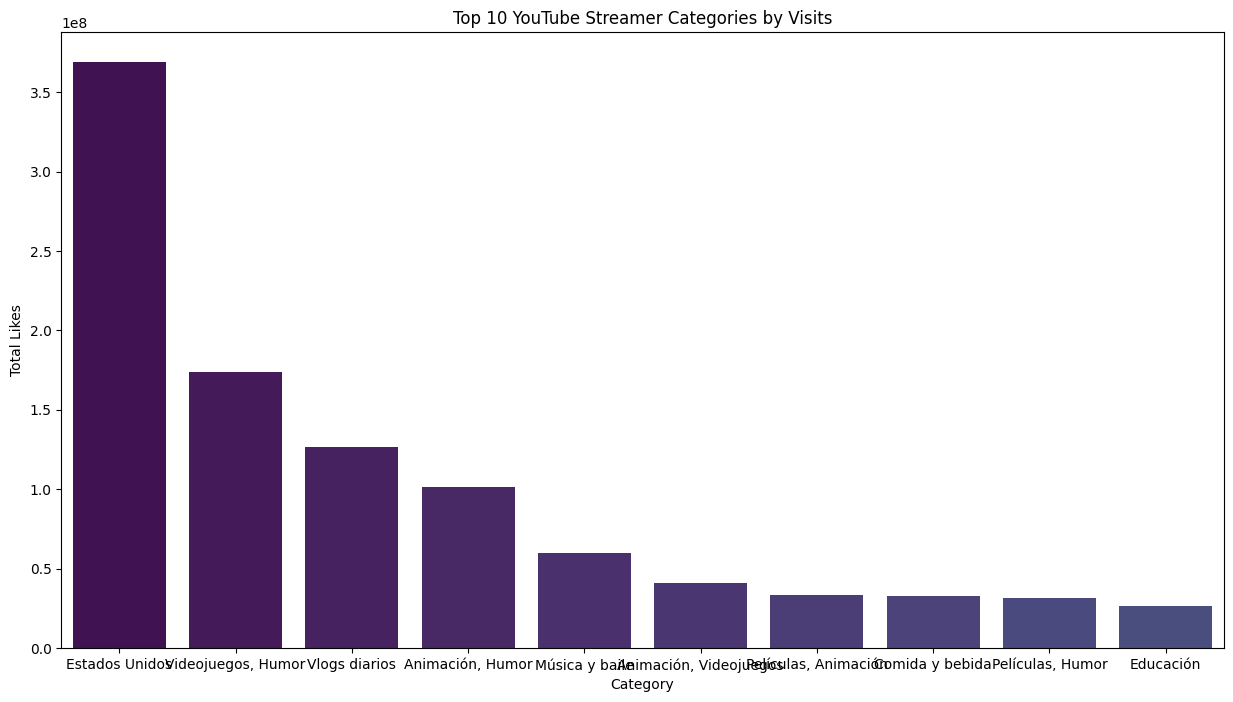

In [47]:
sorted_data = category_Visit.sort_values(by='Visits', ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Categories', y='Visits', data=sorted_data.head(10), palette=colors)
plt.title('Top 10 YouTube Streamer Categories by Visits')
plt.xlabel('Category')
plt.ylabel('Total Likes')

plt.show()

In [31]:
correlation_likes=df['Suscribers'].corr(df['Likes'])

In [32]:
correlation_comments=df['Suscribers'].corr(df['Comments'])

In [33]:
print(f"Correlation between Subscribers and Likes: {correlation_likes:.2f}")

Correlation between Subscribers and Likes: 0.21


In [34]:
print(f"Correlation between Subscribers and Comments: {correlation_comments:.2f}")

Correlation between Subscribers and Comments: 0.04


# 3. Audience Study:
- Analyze the distribution of streamers' audiences by country. Are there regional preferences for
specific content categories?

In [35]:
grouped_con_cat_sus = df.groupby(['Country', 'Categories'])['Suscribers'].sum().reset_index()



In [49]:
sorted_data = grouped_con_cat_sus.sort_values(by='Country', ascending=False)

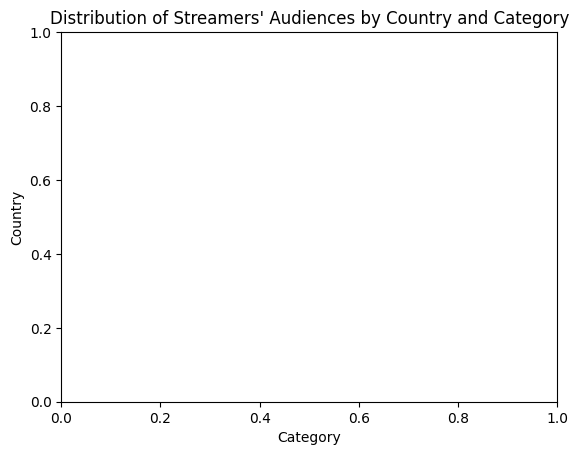

In [50]:

pivot_table = sorted_data.pivot(index='Country', columns='Categories', values='Suscribers')
plt.title('Distribution of Streamers\' Audiences by Country and Category')
plt.xlabel('Category')
plt.ylabel('Country')
plt.show()

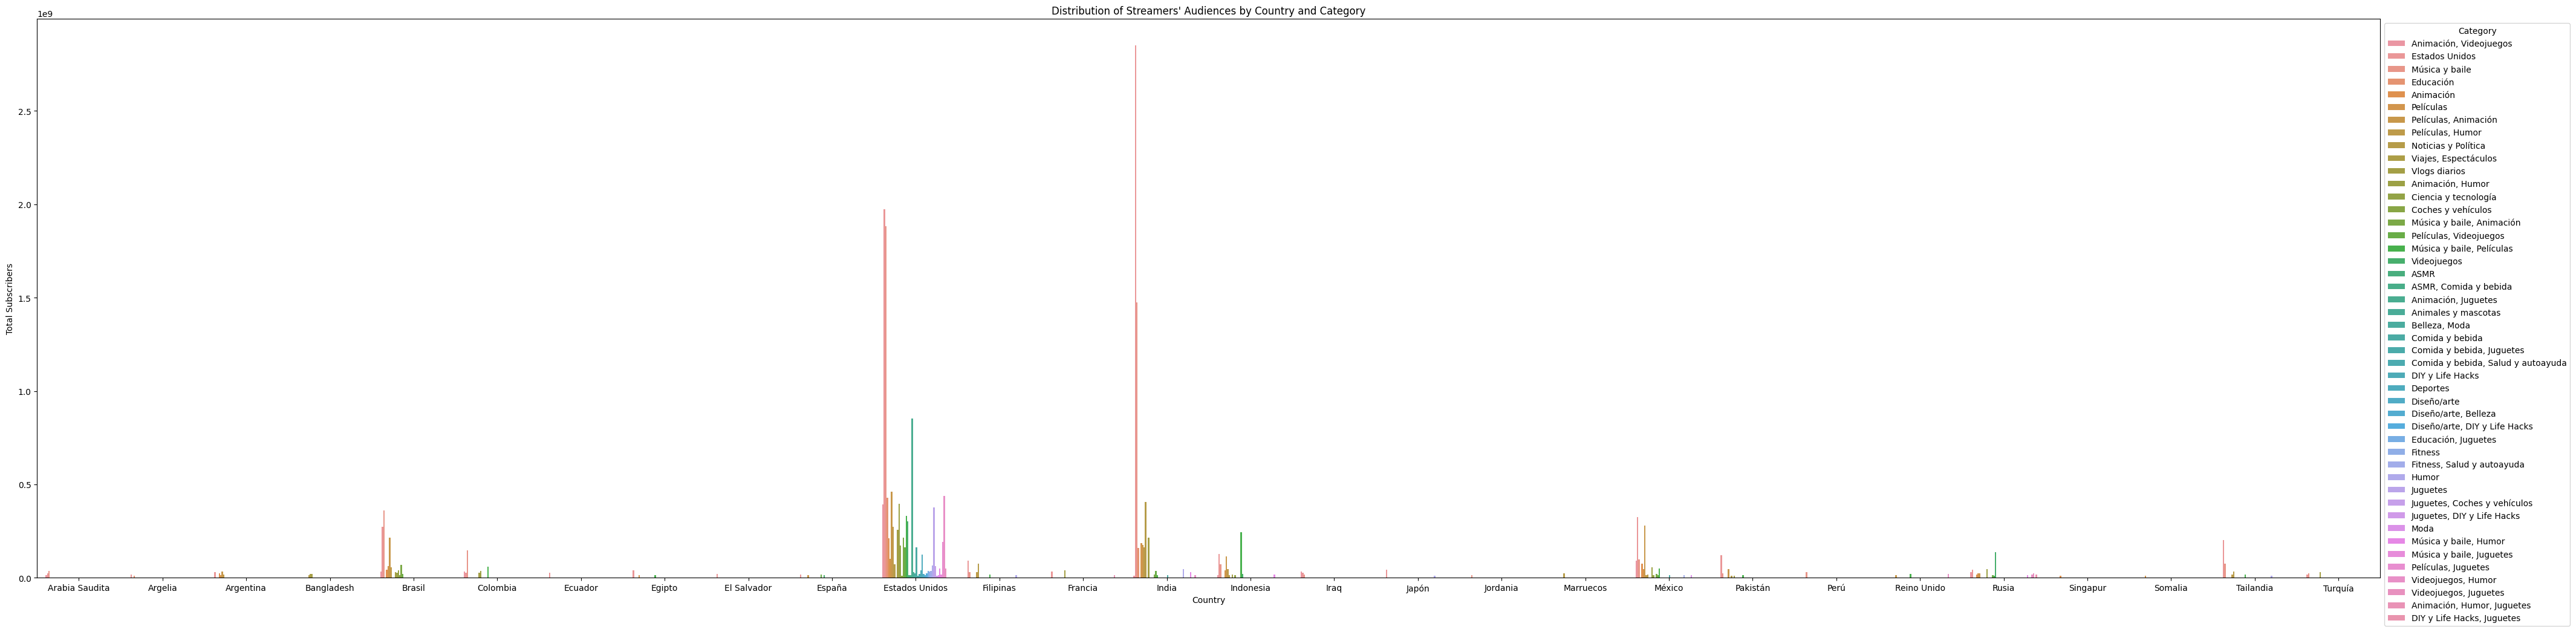

In [42]:
grouped_con_cat_sus = (df.groupby(['Country', 'Categories'])['Suscribers'].sum().reset_index())
plt.figure(figsize=(50, 12))
sns.barplot(
    x='Country',
    y='Suscribers',
    hue='Categories',
    data=grouped_con_cat_sus,
)
plt.title('Distribution of Streamers\' Audiences by Country and Category')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

#4. Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [39]:
average_data=df[['Suscribers','Visits','Likes','Comments']].mean()

In [40]:
average_data

Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64

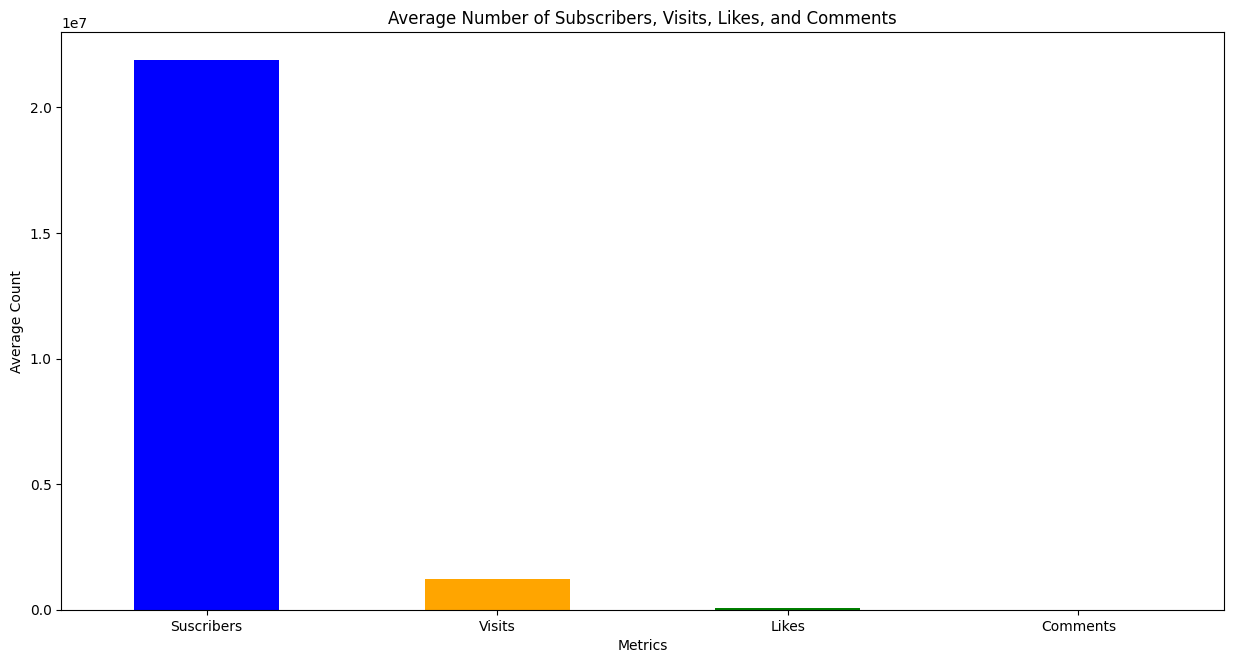

In [41]:
plt.figure(figsize=(15,7.5))
average_data.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Average Number of Subscribers, Visits, Likes, and Comments')
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

# 5. Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

# 6. Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.

# 7. Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

# 8. Content Recommendations:
- Propose a system for enhancing content recommendations to YouTube users based on streamers'categories and performance metrics.